# Enunciado

Bienvenidos a la Actividad 1, donde pondremos en práctica todo lo aprendido durante el bloque 2. Esta actividad la realizaremos en clase, se terminará en casa (debería completarse en clase) y se entregará el día *8 de octubre*.

## ¿En qué consiste?

Vamos a poner en práctica cuatro aspectos del procesamiento de imágenes:
- Lectura de imagen y conversión a escala de grises
- _Umbralización_ de una imagen siguiendo los métodos vistos en clase (y comparándolos)
- _Morfología matemática_ con los operadores conocidos
- _Detección y medida de objetos_ dentro de la imagen. Este último aspecto lo veremos más adelante en el curso, con lo cual, lo que haremos aquí será sencillo y guiado (pero requerirá un esfuerzo pequeño para enfrentaros a un problema que no habéis visto antes)

La finalidad es sencilla. Se os dará una imagen, a color, que tiene varias tonalidades y que está pintada con círculos.

**La actividad consiste en contar el número de círculos de la imagen.**
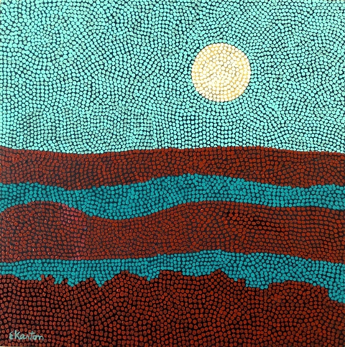

## Evaluación

Se evaluará de la siguiente manera:
- 0 puntos si no se presenta o si sólo se presenta el enunciado con modificaciones mínimas o si el ejercicio no resuelve el problema.
- 5 puntos si se presenta únicamente la resolución del ejercicio (en este caso un proceso que calcule el número de puntos), pero no se justifica los pasos realizados o no se comentan los resultados (comparación entre umbralizaciones, por ejemplo).
- 5-10 puntos, dependiendo de los comentarios realizados y de la profundidad de las explicaciones.

## Formato de entrega
- Se pide entregar el ejercicio de dos maneras:
-- En formato .py (con el código puro)
-- En formato .html

No se aceptará el formato .ipynb
Habilitaré una actividad en Canvas para que podáis subir ambos archivos.

# Inicialización

En primer lugar, cargamos todos los paquetes/frameworks que nos van a hacer falta. Se recomienda visitar la web: https://scikit-image.org/ para ver todas las funcionalidades que permite Scikit Image.

In [ ]:
# Paquetes necesarios para la realización de esta práctica (no son necesarios conocerlos ni entenderlos por ahora)
from skimage.io import imread
from skimage import transform as tf

import matplotlib.pyplot as plt

# Cargamos la función para convertir de RGB a Escala de grises
from skimage.color import rgb2gray

In [ ]:
# Paquete y funciones para realizar una umbralización con Scikit-image
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Estas dos funciones nos sirven para detectar los objetos dentro de una imagen binaria
from skimage.morphology import label
from skimage.measure import regionprops

In [ ]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img, title):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(title)
    plt.show()

## Cargar la imagen

Lo primero de todo, vamos a leer la imagen. Recuerda que hay que subir la imagen cada vez que _inicies sesión_ en el notebook y que la ruta se mira haciendo botón derecho sobre el archivo.

Con lo cual, aquí vamos a hacer dos cosas:
- Cargar la imagen
- Convertirla a escala de grises

Hacemos esto para luego posteriormente umbralizar la imagen en escala de grises.

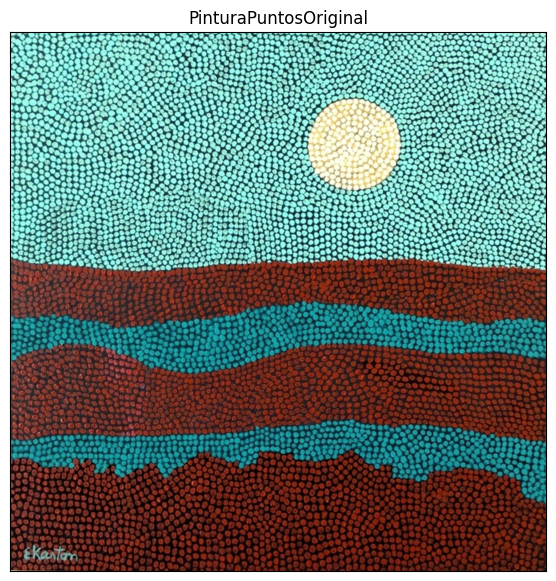

In [ ]:
from google.colab import files
from matplotlib import pyplot as plt
# Cargar la imagen
image_path = imread('Pintura_Puntos.jpg')
imshow(image_path,"PinturaPuntosOriginal")
#Con este codigo lo que hacemos es cargar la imagen a la base de datos, una vez ya subida a google collab

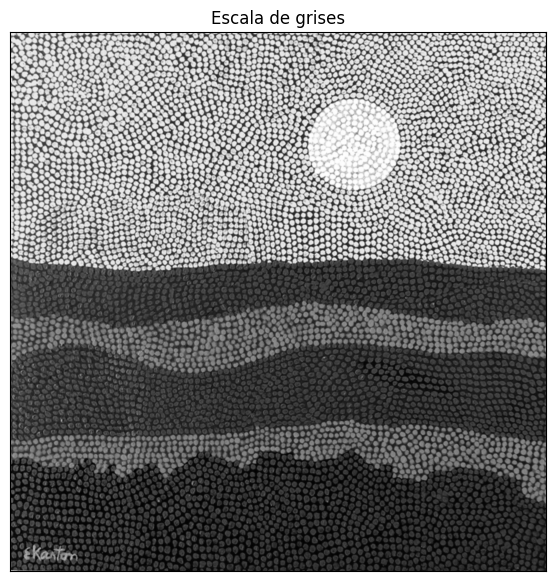

In [ ]:
grayscale_image = rgb2gray(image_path)
imshow(grayscale_image, 'Escala de grises')
#Una vez cargada la imagen, con este codigo la pasamos a escala de grises

## Umbralizar la imagen con varios métodos

Vamos a probar ahora diferentes métodos para umbralizar la imagen. Se pide en esta actividad:
- Ejecutar cada método (para ello tendréis que ver en la documentación cómo invocarlo y qué parámetros necesita)
- Mostrar por pantalla el resultado de cada imagen, añadiendo una explicación de a qué corresponde cada imagen
- Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...): Está comentado debajo del código.
- Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola: Estos corresponden ambos a los tipos de umbralización local
- Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?
En mi caso si que se obtiene el mismo resultado, aunque he visto que en otros compañeros no. Supongo que sí que es el mismo ya que todo funciona de la misma manera, únicamente la imagen está dada la vuelta.

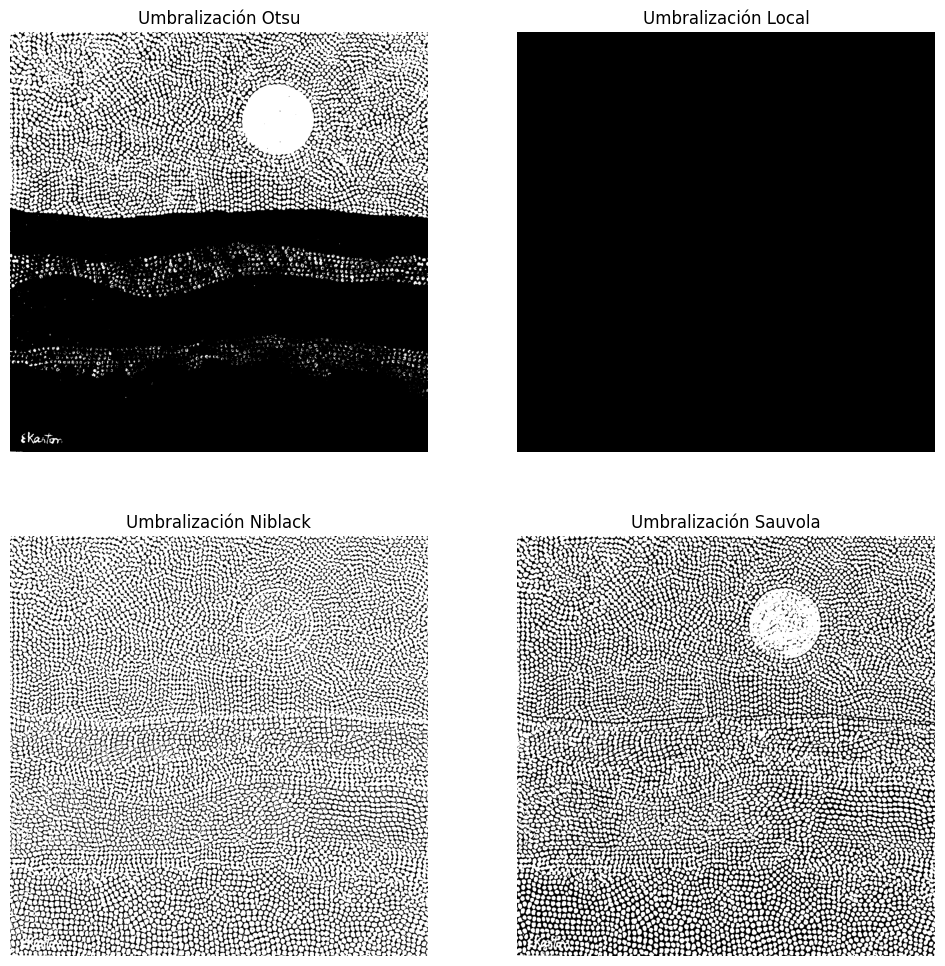

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

# Cargar la imagen (asegúrate de que la imagen ya esté en escala de grises)
imagen = io.imread("Pintura_Puntos.jpg", as_gray=True)

# Umbralización Otsu
otsu_threshold = threshold_otsu(imagen)
otsu_binary = imagen > otsu_threshold

# Umbralización local
local_threshold = threshold_local(imagen, block_size=35, offset=10)
local_binary = imagen > local_threshold

# Umbralización Niblack
niblack_binary = imagen > threshold_niblack(imagen, window_size=21, k=0.8)

# Umbralización Sauvola
sauvola_binary = imagen > threshold_sauvola(imagen, window_size=25)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(otsu_binary, cmap='gray')
plt.title("Umbralización Otsu")
plt.axis('off')

plt.subplot(222)
plt.imshow(local_binary, cmap='gray')
plt.title("Umbralización Local")
plt.axis('off')

plt.subplot(223)
plt.imshow(niblack_binary, cmap='gray')
plt.title("Umbralización Niblack")
plt.axis('off')

plt.subplot(224)
plt.imshow(sauvola_binary, cmap='gray')
plt.title("Umbralización Sauvola")
plt.axis('off')

plt.show()

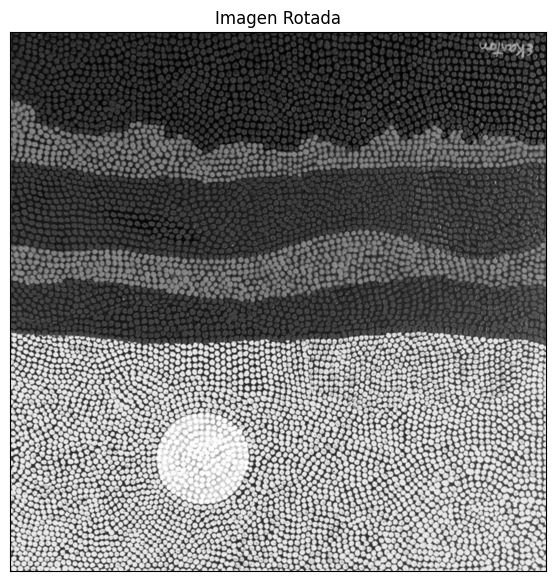

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, transform
ImagenGirada = transform.rotate(grayscale_image, 180)
imshow(ImagenGirada, 'Imagen Rotada')

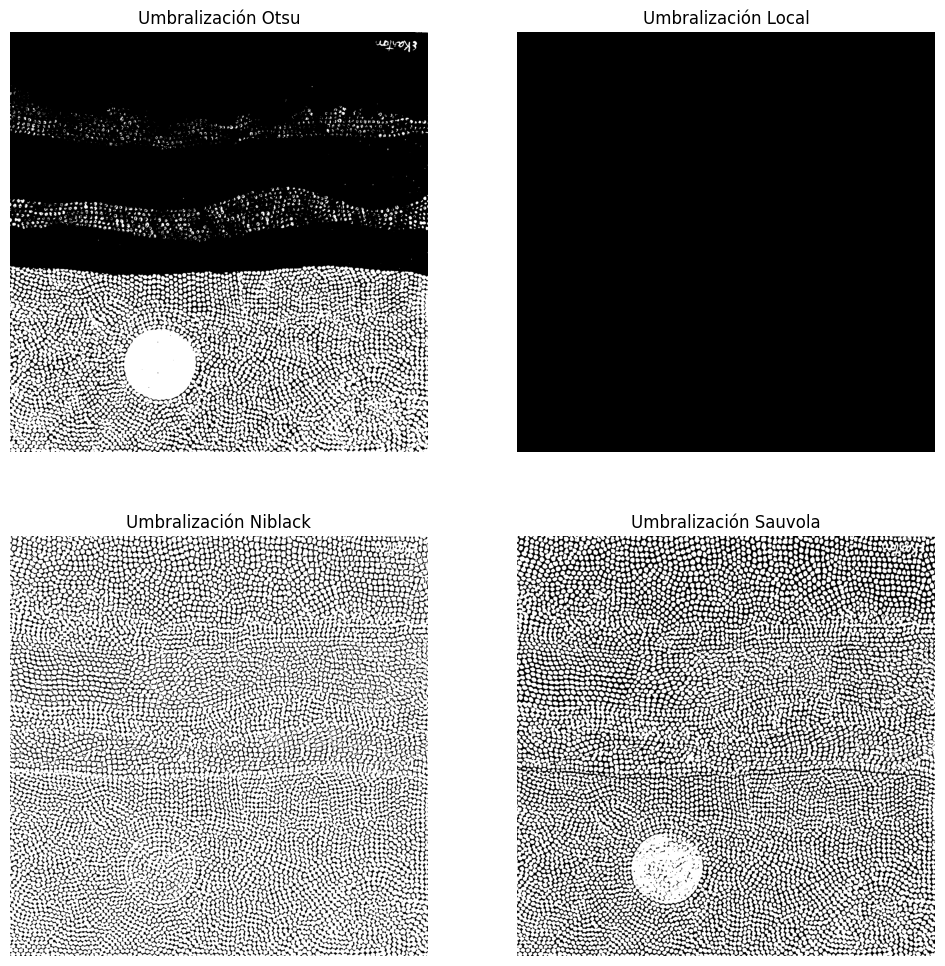

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola


# Umbralización Otsu
otsu_threshold = threshold_otsu(ImagenGirada)
otsu_binary180 = ImagenGirada > otsu_threshold

# Umbralización local
local_threshold = threshold_local(ImagenGirada, block_size=35, offset=10)
local_binary180 = ImagenGirada > local_threshold

# Umbralización Niblack
niblack_binary180 = ImagenGirada > threshold_niblack(ImagenGirada, window_size=21, k=0.8)

# Umbralización Sauvola
sauvola_binary180 = ImagenGirada > threshold_sauvola(ImagenGirada, window_size=25)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(otsu_binary180, cmap='gray')
plt.title("Umbralización Otsu")
plt.axis('off')

plt.subplot(222)
plt.imshow(local_binary180, cmap='gray')
plt.title("Umbralización Local")
plt.axis('off')

plt.subplot(223)
plt.imshow(niblack_binary180, cmap='gray')
plt.title("Umbralización Niblack")
plt.axis('off')

plt.subplot(224)
plt.imshow(sauvola_binary180, cmap='gray')
plt.title("Umbralización Sauvola")
plt.axis('off')

plt.show()

Aqui podemos observar los 4 tipos de umbralizaciones que hemos aplicado a nuestra imagen en escala de grises.
Como podemos ver, la umbralización local es la peor, toda la imagen se vuelve completamente negra. Va seguida de la Otsu.
Tanto Niblack como Sauvola estan bastante bien pero personalmente opino que se diferencian mejor los puntos en la Niblack al haber algo mas de espacio entre ellos y sobre todo es algo que se puede ver en el sol.

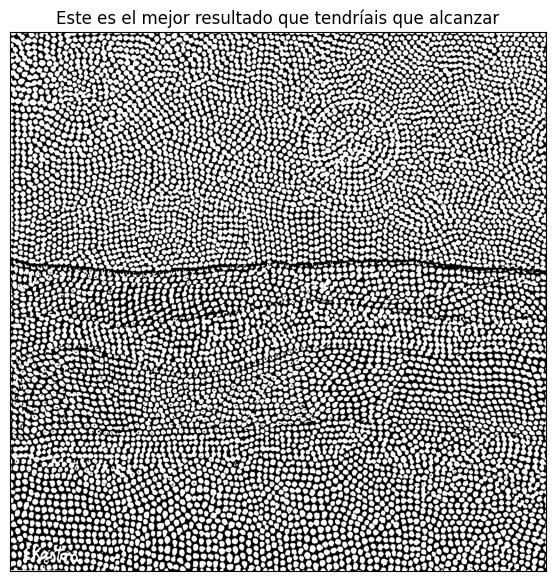

In [ ]:
# Este es el mejor resultado que tendríais que alcanzar
#Como vemos es la Niblack, es verdad que la linea del medio es negra aqui mientras que en mi imagen es blanca pero se nota que es Niblack

# Morfología Matemática

Como se puede apreciar en la imagen hay varios elementos imperfectos:
- Hay círculos que están en contacto con otros círculos
- Hay círculos que están huecos por centro
- Hay círculos que no están cerrados del todo

Mediante el uso de morfología matemática (concretamente los cuatro operadores visto en clase) y los posibles elementos estructurales existentes, se pide:
- Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.
- ¿Qué operador o secuencia de operadores elegiríais?
- Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen _complementaria_, ¿qué conclusiones sacas de esto?


In [ ]:
ImagenBuena = niblack_binary

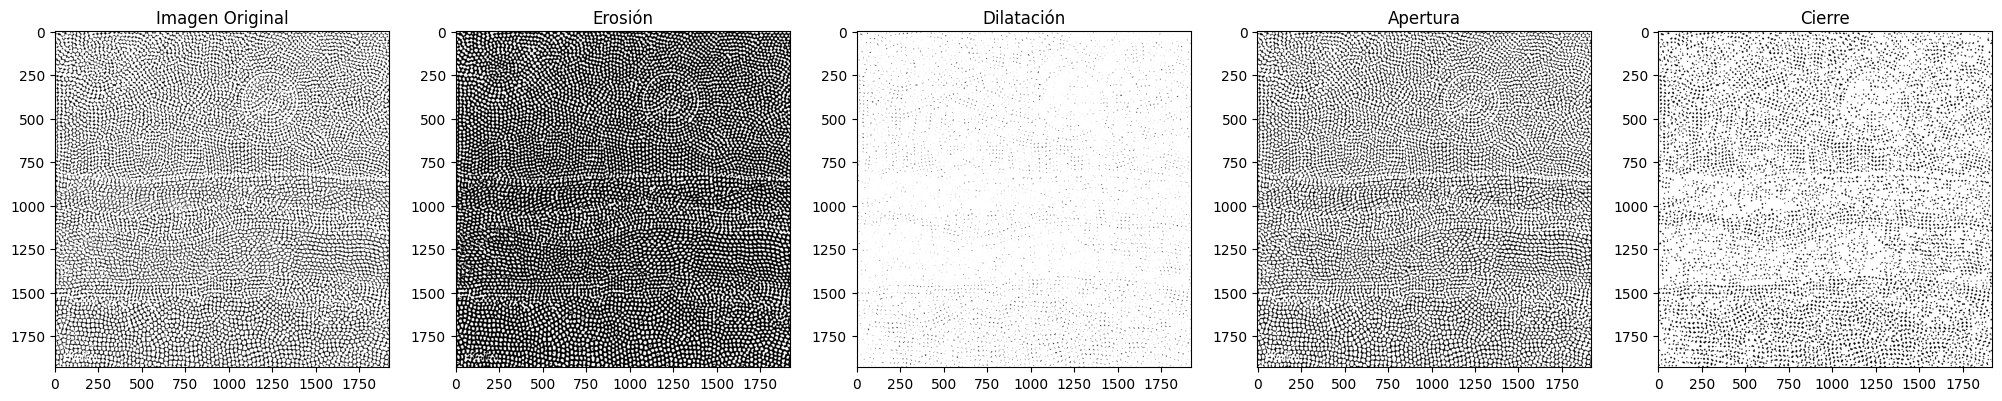

In [ ]:
from skimage import io, morphology
import matplotlib.pyplot as plt


# Aplicar una operación de erosión
imagen_eroded = morphology.erosion(ImagenBuena, morphology.disk(3))

# Aplicar una operación de dilatación
imagen_dilated = morphology.dilation(ImagenBuena, morphology.disk(3))

# Aplicar una operación de apertura
imagen_opened = morphology.opening(ImagenBuena, morphology.disk(3))

# Aplicar una operación de cierre
imagen_closed = morphology.closing(ImagenBuena, morphology.disk(3))

# Mostrar las imágenes resultantes
plt.figure(figsize=(25, 6))

plt.subplot(151)
plt.imshow(ImagenBuena, cmap='gray')
plt.title('Imagen Original')

plt.subplot(152)
plt.imshow(imagen_eroded, cmap='gray')
plt.title('Erosión')

plt.subplot(153)
plt.imshow(imagen_dilated, cmap='gray')
plt.title('Dilatación')

plt.subplot(154)
plt.imshow(imagen_opened, cmap='gray')
plt.title('Apertura')

plt.subplot(155)
plt.imshow(imagen_closed, cmap='gray')
plt.title('Cierre')

plt.show()

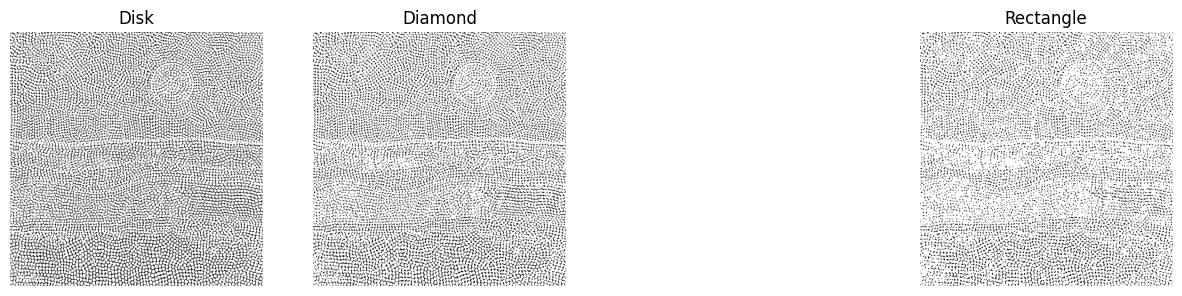

In [ ]:
from skimage import io, morphology
import matplotlib.pyplot as plt



# Elemento estructural: disk
disk_element = morphology.disk(1)
result_disk = morphology.closing(ImagenBuena, disk_element)

# Elemento estructural: diamond
diamond_element = morphology.diamond(2)
result_diamond = morphology.closing(ImagenBuena, diamond_element)

# Elemento estructural: rectangle
rectangle_element = morphology.rectangle(5, 5)
result_rectangle = morphology.closing(ImagenBuena, rectangle_element)

# Mostrar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Disk')
plt.imshow(result_disk, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Diamond')
plt.imshow(result_diamond, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Rectangle')
plt.imshow(result_rectangle, cmap='gray')
plt.axis('off')

plt.show()

Tras haber aplicado todos los elementos estructurales y todos los tipos de morfología matemática a la imagen, podemos llegar a la conclusión de que la mejor morfología matemática para distinguir los círculos será la erosión, mientras que el mejor elemento estructural será el disco o el diamante, la verdad no lo tengo claro entre ambos pero creo que escogería los discos.
Como vemos, para el disco hemos utilizado un tamaño de "1" ya que si escogemos un valor mayor, empezaremos a cargarnos los círculos y eso no nos interesa.

(-0.5, 1919.5, 1929.5, -0.5)

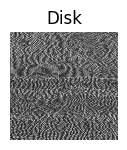

In [ ]:
from skimage import io, morphology
import matplotlib.pyplot as plt



# Elemento estructural: disk
disk_element = morphology.disk(1)
result_disk = morphology.closing(imagen_eroded, disk_element)

plt.subplot(1, 4, 1)
plt.title('Disk')
plt.imshow(result_disk, cmap='gray')
plt.axis('off')


Aquí he intentado juntar en una imagen lo que para mi son el mejor elemento junto con la mejor morfología pero no hay manera de que se vea bien y en grande.

# Contando círculos

Haciendo uso de las funcionalidades cargadas al principio, se pide hacer una función que:
- Reciba como parámetro una imagen binaria
- Compruebe que es binaria y si no es binaria, deberá imprimir por pantalla que no es binaria
- Cuente el número de círculos dentro de la imagen.
- Devuelva (return) dicho número de círculos.

Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?

Nº de círculos: 4483


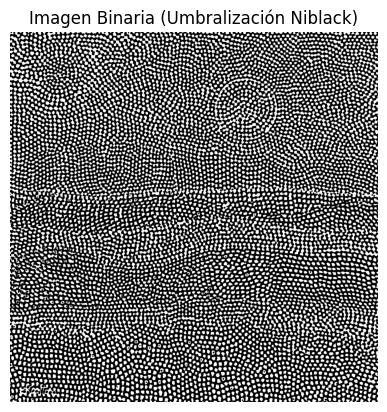

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

def count_circles(imagen_binaria):
    # Comprobar que la imagen es binaria
    if len(np.unique(imagen_binaria)) != 2:
        print("La imagen no es binaria.")
        return None

    # Etiquetar los objetos conectados en la imagen binaria
    labeled_image = measure.label(imagen_binaria, connectivity=2)

    # Calcular las propiedades de los objetos etiquetados
    region_props = measure.regionprops(labeled_image)

    # Inicializar contador de círculos
    num_circulos = 0

    # Umbral de área mínima para considerar un objeto como círculo (ajustar según sea necesario)
    min_area_threshold = 50

    # Contar círculos y eliminar pequeños puntos o ruido
    for prop in region_props:
        if prop.area > min_area_threshold:
            num_circulos += 1

    return num_circulos



# Llama a la función para contar círculos
num_circulos = count_circles(imagen_eroded)

# Imprime el resultado
print("Nº de círculos:", num_circulos)

# Mostrar la imagen binaria
plt.imshow(imagen_eroded, cmap='gray')
plt.title("Imagen Binaria (Umbralización Niblack)")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from skimage import io, color, draw, img_as_ubyte
from skimage.feature import peak_local_max
from skimage.transform import hough_circle, hough_circle_peaks
import matplotlib.pyplot as plt

def contar_circulos_en_imagen(imagen_binaria):
    # Comprobar si la imagen es binaria
    if len(np.unique(imagen_binaria)) != 2:
        print("La imagen no es binaria.")
        return None

    # Convertir la imagen binaria a uint8
    imagen_binaria = img_as_ubyte(imagen_binaria)

    # Detección de círculos usando la transformación de Hough
    radii = np.arange(10, 30)  # Rango de tamaños de círculos a buscar
    hough_res = hough_circle(imagen_binaria, radii)

    # Encontrar los picos en la transformación de Hough
    accums, cx, cy, radii = hough_circle_peaks(hough_res, radii, total_num_peaks=5)

    # Dibujar los círculos detectados en la imagen original (opcional)
    imagen_con_circulos = color.gray2rgb(imagen_binaria)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = draw.circle_perimeter(center_y, center_x, radius)
        imagen_con_circulos[circy, circx] = (255, 0, 0)  # Color rojo

    # Mostrar la imagen con los círculos detectados (opcional)
    plt.imshow(imagen_con_circulos)
    plt.axis('off')
    plt.show()

    # Contar el número de círculos detectados
    numero_de_circulos = len(cx)

    return numero_de_circulos

# Ejemplo de uso:
# Cargar una imagen binaria (asegúrate de que la imagen es binaria)
imagen_binaria = io.imread("Pintura_Puntos.jpg", as_gray=True)

# Llamar a la función para contar los círculos
resultado = contar_circulos_en_imagen(imagen_binaria)

if resultado is not None:
    print(f"Número de círculos en la imagen: {resultado}")
else:
    print("No se pudo contar círculos debido a que la imagen no es binaria o contiene errores en la umbralización.")

La imagen no es binaria.
No se pudo contar círculos debido a que la imagen no es binaria o contiene errores en la umbralización.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

def count_circles(imagen_binaria):
    # Comprobar que la imagen es binaria
    if len(np.unique(imagen_binaria)) != 2:
        print("La imagen no es binaria.")
        return None

    # Etiquetar los objetos conectados en la imagen binaria
    labeled_image = measure.label(imagen_binaria, connectivity=2)

    # Calcular las propiedades de los objetos etiquetados
    region_props = measure.regionprops(labeled_image)

    # Inicializar contador de círculos
    num_circulos = 0

    # Umbral de área mínima para considerar un objeto como círculo (ajustar según sea necesario)
    min_area_threshold = 50

    # Contar círculos y eliminar pequeños puntos o ruido
    for prop in region_props:
        if prop.area > min_area_threshold:
            num_circulos += 1

    return num_circulos



# Llama a la función para contar círculos
num_circulos = count_circles(result_disk)

# Imprime el resultado
print("Nº de círculos:", num_circulos)

# Mostrar la imagen binaria
plt.imshow(result_disk, cmap='gray')
plt.title("Imagen Binaria (Umbralización Niblack)")
plt.axis('off')
plt.show()

Nº de círculos: 4333


En este caso para mostrar la función de contar círculos lo he hecho 3 veces con distintas variantes para ver como cambiaba el numero de circulos. En el caso del Niblack y el Disk he usado el mismo codigo, para el segundo caso he usado otro distinto.
Para el primer y tercer codigo como ya he dicho he usado lo mismo y podemos ver que en el caso de la imagen únicamente con Niblack tenemos más círculos que para la imagen unicamente con discos.
Aún así me resulta extraño que las imagenes niblack y disk son prácticamente iguales por lo que creo que debe de tratarse de algun error.
En el segundo caso he utilizado otro código distinto y lo que he hecho es abrir directamente la imagen original que no es binaria, para comprobar que me saliese por pantalla que "la imagen no es binaria".

# (Bonus) Automatizamos el proceso de extracción

Esta sección no es obligatoria pero la pongo para aquellos que quieran saber "¿y ahora qué se haría?".

Lo que hemos hecho hasta ahora es:
- Encontrar un método de umbralización adecuado (que tiene unos parámetros que ya hemos fijado - según nuestro criterio)
- Hemos utilizado unos métodos de morfología matemática, también con sus parámetros

Es decir, tenemos varios parámetros y tenemos una función que nos dice cuál es el número de puntos dada una imagen. Variando dichos parámetros, variará también el número de puntos, pero no parece haber una relación directa.

También no hay que olvidar que desconocemos el número de puntos (nunca se ha dicho, aunque siempre puedes contarlos), por lo que no podemos seguir un proceso de aprendizaje supervisado (tipo descenso del gradiente sobre los parámetros anteriores para encontrar el mejor resultado).

Pero lo que sí podemos hacer es iterar el valor de los parámetros para alcanzar un máximo de puntos (asumiendo que dicho máximo corresponderá con el mejor resultado). Esto suele hacerse cuando no sabemos exáctamente el resultado que esperamos.

En definitiva, ahora se buscaría realizar un proceso iterativo para encontrar el valor máximo del número de puntos. Para ello haría falta:
- Crear una función que englobe todos los procesos anteriores (umbralización, morfología matemática, etc...) y que tome como parámetro de entrada una imagen en color y devuelva el número de puntos.
- Crear los intervalos donde variarán todos los parámetros que queremos ir modificando
- Crear un proceso iterativo que vaya recorriendo todas las combinaciones de elementos (se recomienda el uso de `product` del paquete `itertools`).
- Una vez terminado el proceso quedarnos con la combinación de paráteros ganadora y el resultado del número de puntos.

Podría decirse que esa combinación de parámetros es la mejor.


In [ ]:
import numpy as np
from itertools import product
from skimage import io, color, morphology

# Paso 1: Crear una función de evaluación
def evaluar_parametros(imagen, umbral, tamaño_elemento_estructural):
    # Realizar umbralización
    imagen_binaria = imagen > umbral

    # Aplicar operaciones de morfología matemática
    elemento_estructural = morphology.disk(tamaño_elemento_estructural)
    imagen_procesada = morphology.closing(imagen_binaria, elemento_estructural)

    # Contar el número de puntos en la imagen procesada
    numero_de_puntos = np.sum(imagen_procesada)

    return numero_de_puntos

# Paso 2: Definir intervalos de parámetros
rangos_umbral = range(0, 256, 10)  # Ejemplo: umbral de 0 a 255 en incrementos de 10
rangos_tamaño_elemento_estructural = range(1, 10)  # Ejemplo: tamaño de 1 a 9

# Paso 3: Generar combinaciones de parámetros
combinaciones_parametros = product(rangos_umbral, rangos_tamaño_elemento_estructural)

# Inicializar variables para rastrear la mejor combinación y el mejor resultado
mejor_combinacion = None
mejor_resultado = 0

# Paso 4: Iteración sobre combinaciones de parámetros
for parametros in combinaciones_parametros:
    umbral, tamaño_elemento_estructural = parametros

    # Cargar la imagen (asegúrate de que la imagen es en escala de grises)
    imagen = io.imread("Pintura_Puntos.jpg", as_gray=True)

    # Evaluar la combinación de parámetros
    resultado = evaluar_parametros(imagen, umbral, tamaño_elemento_estructural)

    # Paso 5: Seguir la mejor combinación
    if resultado > mejor_resultado:
        mejor_resultado = resultado
        mejor_combinacion = parametros

# Paso 6: Conclusión
print("Mejor combinación de parámetros:", mejor_combinacion)
print("Mejor resultado (número de puntos):", mejor_resultado)

Mejor combinación de parámetros: (0, 1)
Mejor resultado (número de puntos): 3705600
